# Manchester Marathon Results

In [78]:
from pywaffle import Waffle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
import warnings
warnings.filterwarnings('ignore')

## 18-34 vs 35+ Proportions From 2022-2024

In [39]:
# Read in the marathon data
m_mara_24 = pd.read_csv('Manch_Marathon_2024.csv')
m_mara_23 = pd.read_csv('Manch_Marathon_2023.csv')
m_mara_22 = pd.read_csv('Manch_Marathon_2022.csv')

### 2024

In [40]:
# Extract just the age group
m_mara_24_Cat = m_mara_24[['Category']]

In [41]:
# First, get rid of cateogries we don't want: "All Male" and "TBC" 
m_mara_24_Cat = m_mara_24_Cat[m_mara_24_Cat["Category"].str.contains("All Male|TBC") == False]

# Change category values to ignore gender results. We want all those age 35, 40, etc. together
# for this instance, we're going to change senior to 18-34, and everything else to 35+ 
m_mara_24_Cat.loc[m_mara_24_Cat['Category'].str.contains('SEN', na=False), 'Category'] = "18-34"
m_mara_24_Cat.loc[~m_mara_24_Cat['Category'].str.contains('18-34', na=False), 'Category'] = "35+"

In [47]:
# Now let's calculate the proportion of these two age groups

# First we want the count of entries in each group
m_mara_24_Cat_count_prop = pd.DataFrame(m_mara_24_Cat.groupby(by='Category').size())
# Rename the column to something more appropriate
m_mara_24_Cat_count_prop = m_mara_24_Cat_count_prop.rename(columns={0:'count'})
# Calculate the proportion
m_mara_24_Cat_count_prop['prop'] = (m_mara_24_Cat_count_prop['count']/m_mara_24_Cat_count_prop['count'].sum())*100
# print
m_mara_24_Cat_count_prop

,count,prop
Category,,
18-34,10940,49.102334
35+,11340,50.897666


### 2023

In [53]:
# Extract just the age group
m_mara_23_Cat = m_mara_23[['Category']]

In [54]:
# First, get rid of cateogries we don't want: "All Male" and "TBC" 
m_mara_23_Cat = m_mara_23_Cat[m_mara_23_Cat["Category"].str.contains("All Male|TBC") == False]

# Change category values to ignore gender results. We want all those age 35, 40, etc. together
# for this instance, we're going to change senior to 18-34, and everything else to 35+ 
m_mara_23_Cat.loc[m_mara_23_Cat['Category'].str.contains('S', na=False), 'Category'] = "18-34"
m_mara_23_Cat.loc[~m_mara_23_Cat['Category'].str.contains('18-34', na=False), 'Category'] = "35+"

In [55]:
# Now let's calculate the proportion of these two age groups

# First we want the count of entries in each group
m_mara_23_Cat_count_prop = pd.DataFrame(m_mara_23_Cat.groupby(by='Category').size())
# Rename the column to something more appropriate
m_mara_23_Cat_count_prop = m_mara_23_Cat_count_prop.rename(columns={0:'count'})
# Calculate the proportion
m_mara_23_Cat_count_prop['prop'] = (m_mara_23_Cat_count_prop['count']/m_mara_23_Cat_count_prop['count'].sum())*100
# print
m_mara_23_Cat_count_prop

,count,prop
Category,,
18-34,7675,41.41485
35+,10857,58.58515


### 2022

In [59]:
# Extract just the age group
m_mara_22_Cat = m_mara_22[['Category']]

In [60]:
# First, get rid of cateogries we don't want: "All Male" and "TBC" 
m_mara_22_Cat = m_mara_22_Cat[m_mara_22_Cat["Category"].str.contains("All Male|TBC") == False]

# Change category values to ignore gender results. We want all those age 35, 40, etc. together
# for this instance, we're going to change senior to 18-34, and everything else to 35+ 
m_mara_22_Cat.loc[m_mara_22_Cat['Category'].str.contains('S', na=False), 'Category'] = "18-34"
m_mara_22_Cat.loc[~m_mara_22_Cat['Category'].str.contains('18-34', na=False), 'Category'] = "35+"

In [61]:
# Now let's calculate the proportion of these two age groups

# First we want the count of entries in each group
m_mara_22_Cat_count_prop = pd.DataFrame(m_mara_22_Cat.groupby(by='Category').size())
# Rename the column to something more appropriate
m_mara_22_Cat_count_prop = m_mara_22_Cat_count_prop.rename(columns={0:'count'})
# Calculate the proportion
m_mara_22_Cat_count_prop['prop'] = (m_mara_22_Cat_count_prop['count']/m_mara_22_Cat_count_prop['count'].sum())*100
# print
m_mara_22_Cat_count_prop

,count,prop
Category,,
18-34,5183,36.641923
35+,8962,63.358077


### Plot

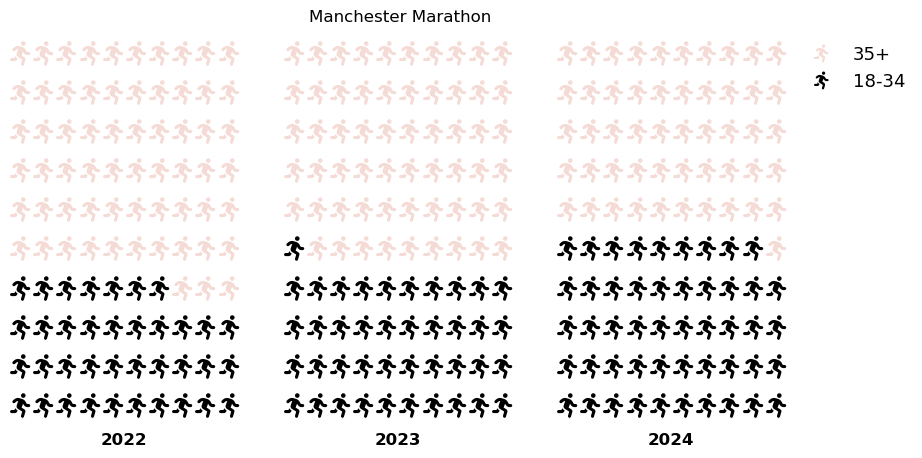

In [64]:
# Set up the figure and axes
f, ax = plt.subplots(1, 3, figsize=(10,5))

########################### 2022
Waffle.make_waffle(
    ax=ax[0], 
    rows=10,
    values=m_mara_22_Cat_count_prop['prop'], 
    icons='person-running',
    icon_size=18, 
    icon_legend=True,
    vertical=True,
    colors=["#000000", "#F5DBD5"],
    title={"label": "2022", "loc": "center", "y":-0.1, "fontweight":"bold"}
)

########################## 2023
Waffle.make_waffle(
    ax=ax[1], 
    rows=10,
    values=m_mara_23_Cat_count_prop['prop'], 
    icons='person-running',
    icon_size=18, 
    icon_legend=True,
    vertical=True,
    colors=["#000000", "#F5DBD5"],
    title={"label": "2023", "loc": "center", "y":-0.1, "fontweight":"bold"}
)

########################## 2024
Waffle.make_waffle(
    ax=ax[2], 
    rows=10,
    values=m_mara_24_Cat_count_prop['prop'], 
    icons='person-running',
    icon_size=18, 
    icon_legend=True,
    vertical=True,
    colors=["#000000", "#F5DBD5"],
    legend={
        'labels': ['18-34', '35+'], 
        'loc': 'upper right', 
        'bbox_to_anchor': (1.6, 1),
        'ncol': 1,
        'fontsize':13,
        'framealpha':0,
        'reverse':True
    },
    title={"label": "2024", "loc": "center", "y":-0.1, "fontweight":"bold"}    
)

# Create a title
f.suptitle('Manchester Marathon', y=0.92, x=0.515);

# Save the figure to the extent of the title, legend, etc. 
f.savefig("18_34.png", bbox_inches='tight')

---

## Split Times per Checkpoint (min/km) in 2024 (only for finishers)

In [65]:
# Drop rows with NA values in any of the splits
m_mara_24_subset = m_mara_24.dropna(subset = ['Split - 10k - Rank', 'Split - 21k - Rank', 
                                              'Split - 30k - Rank', 'Split - Finish - Duration'])

m_mara_24_subset = m_mara_24_subset.reset_index()

### Convert duration to average split times (min/km)


#### Split 1

In [66]:
# Create a DateTimeIndex to extract the hours, minutes, seconds, etc.
split1 = pd.DatetimeIndex(m_mara_24_subset['Split - 10k - Duration'])

# Create a new column which is minutes and seconds (decimal) per km in the first split (10km)
m_mara_24_subset['split1_minutes_and_seconds_per_km_decimal'] = pd.DataFrame((split1.hour*60+split1.minute+(split1.second*(1/60)))/10)

#### Split 2

In [67]:
# Create a DateTimeIndex to extract the hours, minutes, seconds, etc.
split2 = pd.DatetimeIndex(m_mara_24_subset['Split - 21k - Duration'])

# Create a new column which is minutes and seconds (decimal) per km in the second split (21km - 10km = 11km)
m_mara_24_subset['split2_minutes_and_seconds_per_km_decimal'] = pd.DataFrame((split2.hour*60+split2.minute+(split2.second*(1/60)))/11)

#### Split 3

In [68]:
# Create a DateTimeIndex to extract the hours, minutes, seconds, etc.
split3 = pd.DatetimeIndex(m_mara_24_subset['Split - 30k - Duration'])

# Create a new column which is minutes and seconds (decimal) per km in the third split (30km - 21km = 9km)
m_mara_24_subset['split3_minutes_and_seconds_per_km_decimal'] = pd.DataFrame((split3.hour*60+split3.minute+(split3.second*(1/60)))/9)

#### Split 4

In [69]:
# Create a DateTimeIndex to extract the hours, minutes, seconds, etc.
split4 = pd.DatetimeIndex(m_mara_24_subset['Split - Finish - Duration'])

# Create a new column which is minutes and seconds (decimal) per km in the final split (42.2km - 30km = 12.2km)
m_mara_24_subset['split4_minutes_and_seconds_per_km_decimal'] = pd.DataFrame((split4.hour*60+split4.minute+(split4.second*(1/60)))/12.2)

### Plot

In [70]:
# Create a subset with the splits (min/km - decimal)
m_mara_splits_decimal = m_mara_24_subset[['Category', 'split1_minutes_and_seconds_per_km_decimal', 'split2_minutes_and_seconds_per_km_decimal', 'split3_minutes_and_seconds_per_km_decimal', 'split4_minutes_and_seconds_per_km_decimal']]

In [71]:
# Change category value to get rid of gender - want split times per age group
m_mara_splits_decimal.loc[m_mara_splits_decimal['Category'].str.contains('S', na=False), 'Category'] = "18-34"
m_mara_splits_decimal.loc[m_mara_splits_decimal['Category'].str.contains('35', na=False), 'Category'] = "35"
m_mara_splits_decimal.loc[m_mara_splits_decimal['Category'].str.contains('40', na=False), 'Category'] = "40"
m_mara_splits_decimal.loc[m_mara_splits_decimal['Category'].str.contains('45', na=False), 'Category'] = "45"
m_mara_splits_decimal.loc[m_mara_splits_decimal['Category'].str.contains('50', na=False), 'Category'] = "50"
m_mara_splits_decimal.loc[m_mara_splits_decimal['Category'].str.contains('55', na=False), 'Category'] = "55"
m_mara_splits_decimal.loc[m_mara_splits_decimal['Category'].str.contains('60', na=False), 'Category'] = "60"
m_mara_splits_decimal.loc[m_mara_splits_decimal['Category'].str.contains('65', na=False), 'Category'] = "65"
m_mara_splits_decimal.loc[m_mara_splits_decimal['Category'].str.contains('70', na=False), 'Category'] = "70+"
m_mara_splits_decimal.loc[m_mara_splits_decimal['Category'].str.contains('75', na=False), 'Category'] = "70+"

# Get rid of remaining cateogries: "All Male" and "TBC"
m_mara_splits_decimal = m_mara_splits_decimal[m_mara_splits_decimal["Category"].str.contains("All Male|TBC") == False]

In [98]:
# Calculate the average split time, for each checkpoint, per age group
m_mara_splits_decimal_groupby = m_mara_splits_decimal.groupby(by='Category').mean()

# Rename columns
m_mara_splits_decimal_groupby.columns = ['10km', '21km', '30km', 'Finish']

# To plot the data, we need to unstack the dataframe. We want the average split time (decimal), per age group, per checkpoint
m_mara_splits_decimal_melt = m_mara_splits_decimal_groupby.melt(ignore_index=False).reset_index()

# Preview dataset
m_mara_splits_decimal_melt.head()

,Category,variable,value
0,18-34,10km,5.572745
1,35,10km,5.435623
2,40,10km,5.529309
3,45,10km,5.593362
4,50,10km,5.738478


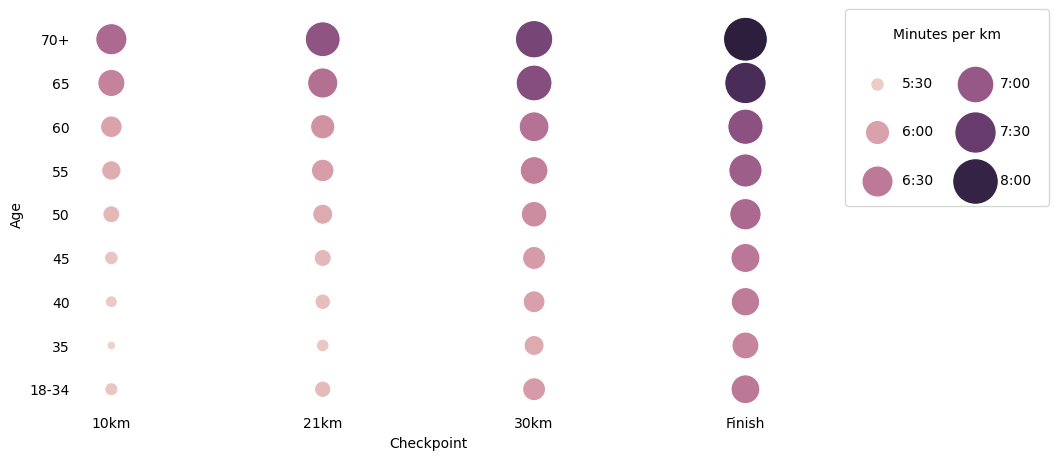

In [99]:
# Set up the figure and axes
f, ax = plt.subplots(1, figsize=(9,5))

# Create a scatter plot where the size and colour of the points are determined by the value
splits = sns.scatterplot(x='variable', y='Category', data=m_mara_splits_decimal_melt, size='value', sizes=(40,1000), hue='value', ax=ax, clip_on=False)

# Crteate a legend to the right of the figure
leg = splits.legend(loc='upper right', bbox_to_anchor=(1.4, 1.05), ncol=2, frameon=True, labelspacing=2.5, borderpad=1.3, title='Minutes per km')

# rename legend entries to minutes:seconds
leg.get_texts()[0].set_text('5:30')
leg.get_texts()[1].set_text('6:00')
leg.get_texts()[2].set_text('6:30')
leg.get_texts()[3].set_text('7:00')
leg.get_texts()[4].set_text('7:30')
leg.get_texts()[5].set_text('8:00')

# Edit the formatting of the plot
ax.spines[['right', 'top', 'bottom', 'left']].set_visible(False)
ax.set_xlabel("Checkpoint")
ax.set_ylabel("Age")
plt.tick_params(bottom=False, left=False)
plt.gca().invert_yaxis()

# Save the figure
f.savefig("Min_per_km.png", bbox_inches='tight')